## Visualizing the distribution of a dataset
* https://seaborn.pydata.org/tutorial/distributions.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set()

## Plotting univariate distributions

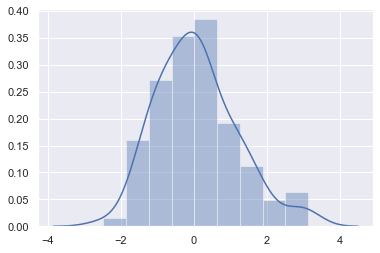

In [2]:
x = np.random.normal(size=100)

sns.distplot(x)

### Histograms

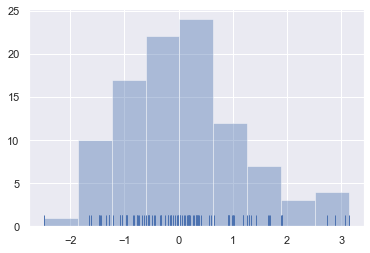

In [3]:
sns.distplot(x, kde=False, rug=True)

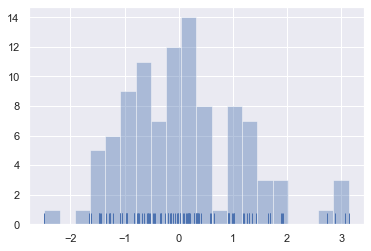

In [4]:
sns.distplot(x, bins=20, kde=False, rug=True)

### Kernel density estimation

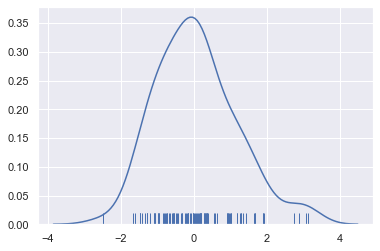

In [5]:
sns.distplot(x, hist=False, rug=True)

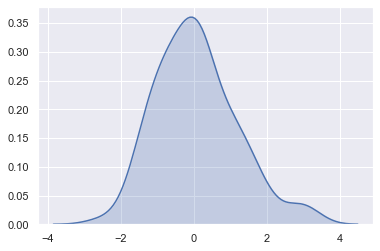

In [6]:
sns.kdeplot(x, shade=True)

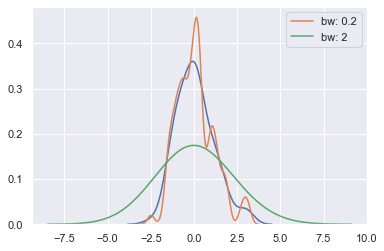

In [7]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")

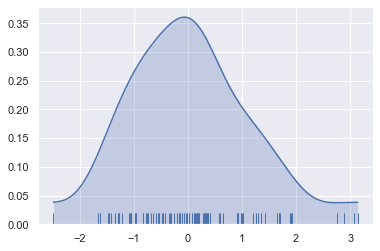

In [8]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

In [9]:
x = np.random.gamma(6, size=200)

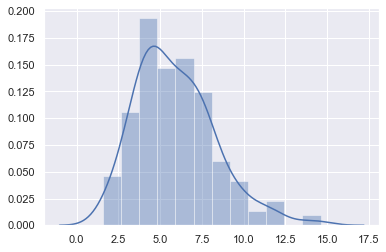

In [10]:
sns.distplot(x)

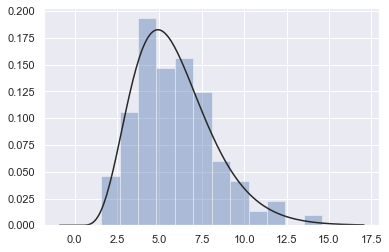

In [11]:
sns.distplot(x, kde=False, fit=stats.gamma)

### Plotting bivariate distributions

In [12]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,0.866897,2.438239
1,0.023905,-0.820711
2,-1.236187,-0.017613
3,1.613420,1.343271
4,0.307075,2.358745


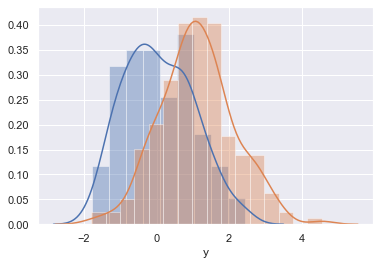

In [13]:
sns.distplot(df["x"])
sns.distplot(df["y"])

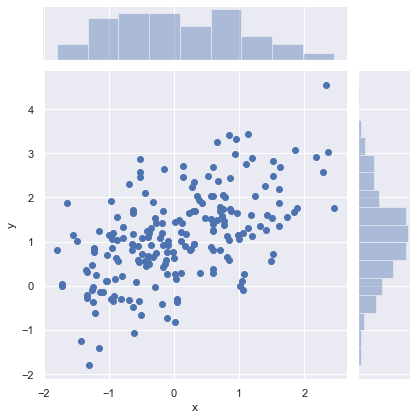

In [14]:
# sns.jointplot(df["x"], df["y"])
sns.jointplot(x="x", y="y", data=df)

#### Hexbin plots

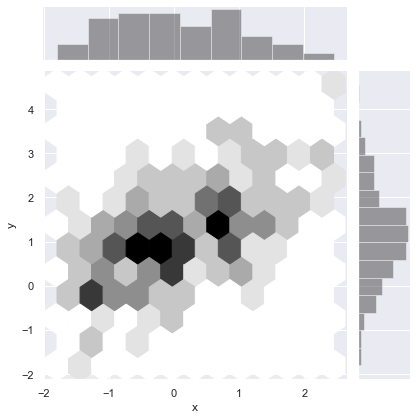

In [15]:
sns.jointplot(x="x", y="y", data=df, kind="hex", color="k")

#### Kernel density estimation

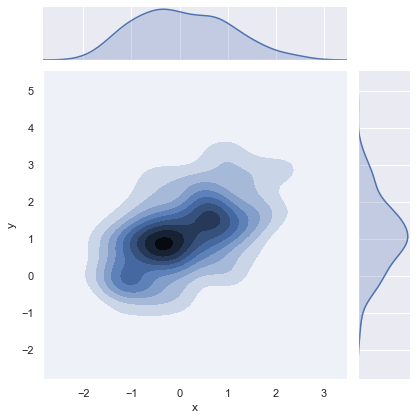

In [16]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

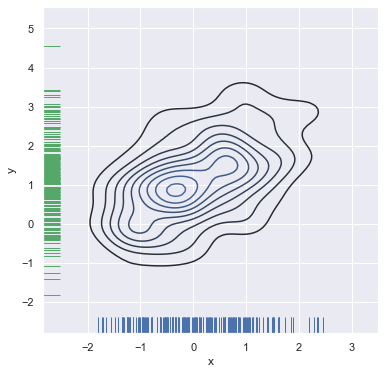

In [17]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df["x"], df["y"])
sns.rugplot(df["x"])
sns.rugplot(df["y"], color="g", vertical=True)

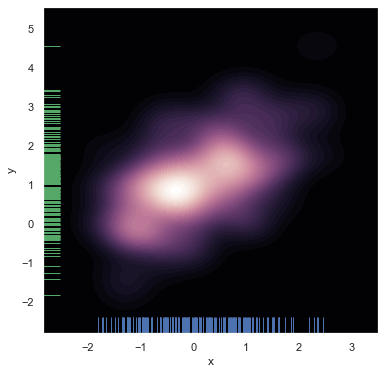

In [18]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df["x"], df["y"], cmap=cmap, n_levels=60, shade=True)
sns.rugplot(df["x"])
sns.rugplot(df["y"], color="g", vertical=True)

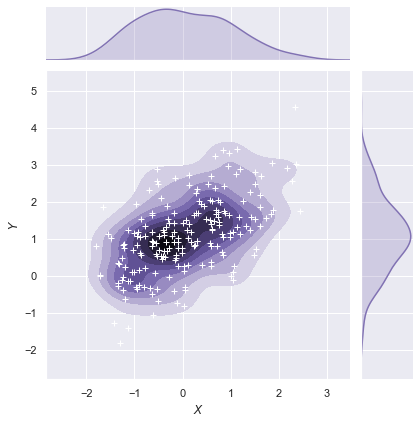

In [19]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### Visualizing pairwise relationships in a dataset

* [Paired density and scatterplot matrix — seaborn documentation](https://seaborn.pydata.org/examples/pair_grid_with_kde.html)

In [28]:
iris = sns.load_dataset("iris")
iris.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


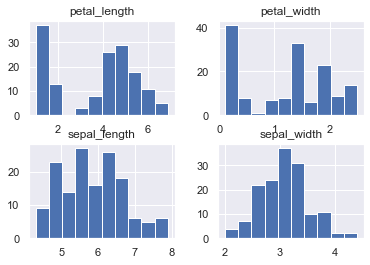

In [30]:
h = iris.hist()

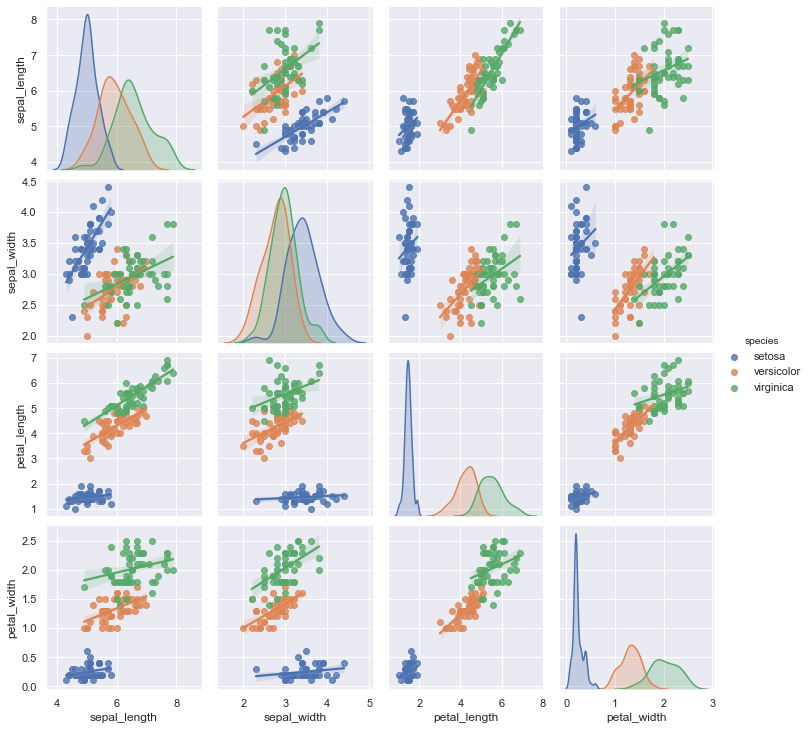

In [33]:
sns.pairplot(iris, hue="species", kind="reg")

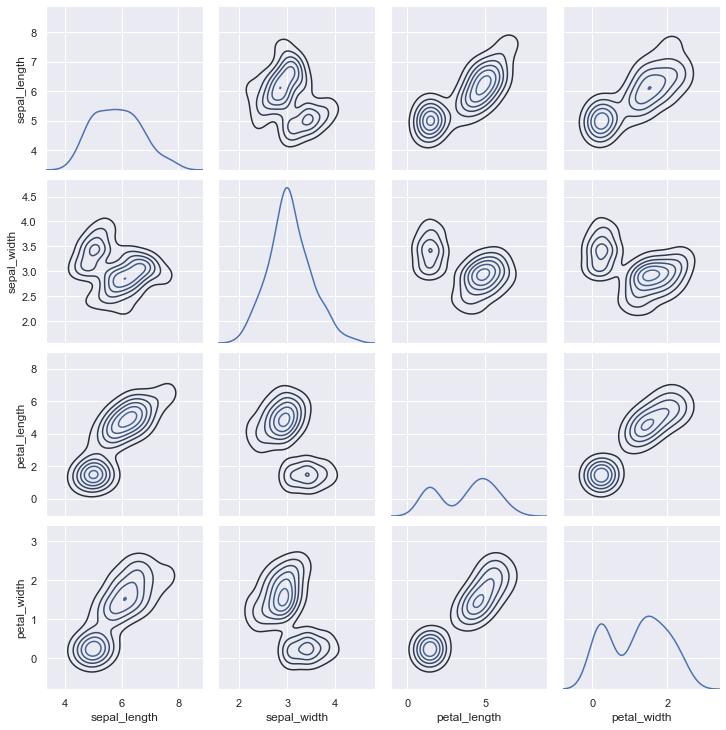

In [34]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

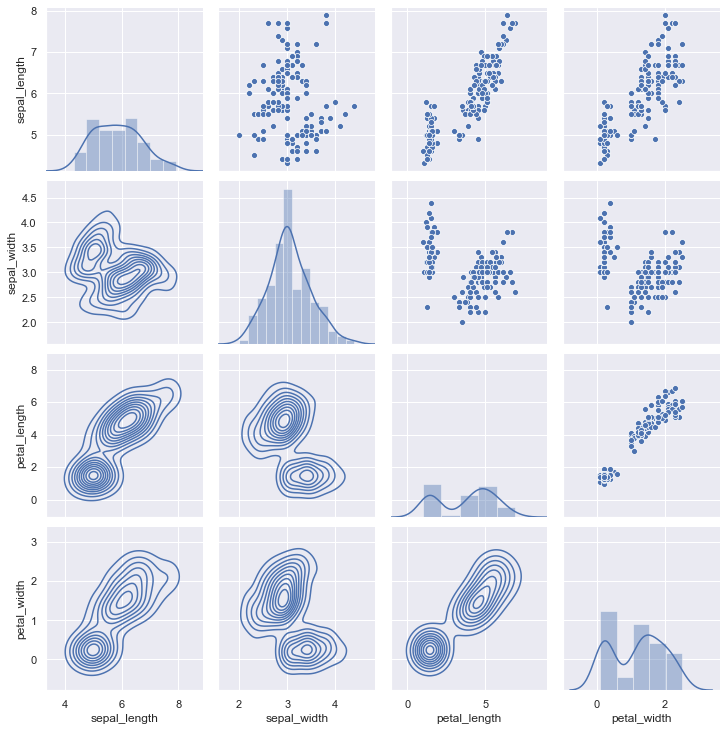

In [39]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")

In [51]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### ridgeplot

* [Overlapping densities (‘ridge plot’) — seaborn documentation](https://seaborn.pydata.org/examples/kde_ridgeplot.html)

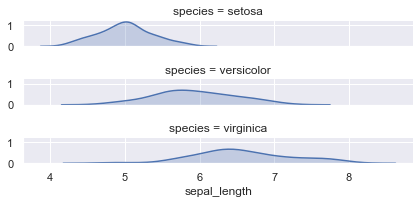

In [50]:
g = sns.FacetGrid(iris, row="species", height=1, aspect=6)
g.map(sns.kdeplot, "sepal_length", shade=True)

#### Summary

* FacetGrid : col, row 에 각각 특정 범주형 변수 하나의 값에 따라 서브플롯을 그립니다.
* PairGrid : col, row 에 여러 변수를 지정해서 그립니다.